<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [29]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD



In [46]:
def split_zip_df(path):
  data = np.load(path)
  features = 'arr_0'
  target = 'arr_1'
  X = data[features]
  y = data[target]
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.20,
      stratify= y,
      random_state=17)
  X_train, X_val, y_train, y_val = train_test_split(
      X_train, y_train, test_size=0.20,
      stratify= y_train,
      random_state=17)

  return X_train, y_train, X_val, y_val, X_test, y_test

  
X_train, y_train, X_val, y_val, X_test, y_test = split_zip_df('quickdraw10.npz')

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((64000, 784), (64000,), (16000, 784), (16000,), (20000, 784), (20000,))

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [47]:
def create_model(lr, opt): #lr = Learning rate, opt = optimizer
  model = Sequential([
                      Dense(32, activation='relu', input_dim=784),
                      Dense(32, activation='relu'),
                      Dense(16, activation='relu'),
                      Dense(10, activation='softmax')
  ])
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [16]:
model = create_model(lr = 0.01, opt = SGD(learning_rate=0.01))
bt_largest = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=512,
    validation_data=(X_val,y_val))


Epoch 1/25
125/125 [==============================] - 1s 7ms/step - loss: 7.9741 - accuracy: 0.0990 - val_loss: 2.3042 - val_accuracy: 0.1023
Epoch 2/25
125/125 [==============================] - 1s 6ms/step - loss: 2.2540 - accuracy: 0.1296 - val_loss: 2.1669 - val_accuracy: 0.1709
Epoch 3/25
125/125 [==============================] - 1s 6ms/step - loss: 2.1350 - accuracy: 0.1815 - val_loss: 2.1234 - val_accuracy: 0.1889
Epoch 4/25
125/125 [==============================] - 1s 6ms/step - loss: 2.1124 - accuracy: 0.1851 - val_loss: 2.1080 - val_accuracy: 0.1912
Epoch 5/25
125/125 [==============================] - 1s 6ms/step - loss: 2.1005 - accuracy: 0.1911 - val_loss: 2.0995 - val_accuracy: 0.1932
Epoch 6/25
125/125 [==============================] - 1s 6ms/step - loss: 2.0919 - accuracy: 0.1919 - val_loss: 2.0920 - val_accuracy: 0.1930
Epoch 7/25
125/125 [==============================] - 1s 6ms/step - loss: 2.0851 - accuracy: 0.1924 - val_loss: 2.0849 - val_accuracy: 0.1933
Epoch 

In [17]:
model = create_model(lr = 0.01, opt = SGD(learning_rate=0.01))
bt_large = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=256,
    validation_data=(X_val,y_val))

Epoch 1/25
250/250 [==============================] - 1s 4ms/step - loss: 6.8093 - accuracy: 0.0991 - val_loss: 2.3051 - val_accuracy: 0.1001
Epoch 2/25
250/250 [==============================] - 1s 4ms/step - loss: 2.3040 - accuracy: 0.0998 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 3/25
250/250 [==============================] - 1s 4ms/step - loss: 2.3021 - accuracy: 0.0990 - val_loss: 2.3885 - val_accuracy: 0.1017
Epoch 4/25
250/250 [==============================] - 1s 4ms/step - loss: 2.3034 - accuracy: 0.0986 - val_loss: 2.3036 - val_accuracy: 0.0997
Epoch 5/25
250/250 [==============================] - 1s 4ms/step - loss: 2.3022 - accuracy: 0.0993 - val_loss: 2.3032 - val_accuracy: 0.0997
Epoch 6/25
250/250 [==============================] - 1s 4ms/step - loss: 2.3008 - accuracy: 0.1006 - val_loss: 2.2945 - val_accuracy: 0.1135
Epoch 7/25
250/250 [==============================] - 1s 4ms/step - loss: 2.1824 - accuracy: 0.1668 - val_loss: 2.1234 - val_accuracy: 0.1834
Epoch 

In [19]:
model = create_model(lr = 0.01, opt = SGD(learning_rate=0.01))
bt_default = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=128,
    validation_data=(X_val,y_val))

Epoch 1/25
500/500 [==============================] - 1s 3ms/step - loss: 23.6279 - accuracy: 0.1162 - val_loss: 2.1687 - val_accuracy: 0.1614
Epoch 2/25
500/500 [==============================] - 1s 3ms/step - loss: 2.0232 - accuracy: 0.2347 - val_loss: 1.9369 - val_accuracy: 0.2597
Epoch 3/25
500/500 [==============================] - 1s 3ms/step - loss: 1.9090 - accuracy: 0.2747 - val_loss: 1.8795 - val_accuracy: 0.2788
Epoch 4/25
500/500 [==============================] - 1s 2ms/step - loss: 1.8686 - accuracy: 0.2829 - val_loss: 1.8545 - val_accuracy: 0.2835
Epoch 5/25
500/500 [==============================] - 1s 3ms/step - loss: 1.8391 - accuracy: 0.2958 - val_loss: 1.8265 - val_accuracy: 0.3042
Epoch 6/25
500/500 [==============================] - 1s 3ms/step - loss: 1.8131 - accuracy: 0.3060 - val_loss: 1.8606 - val_accuracy: 0.2949
Epoch 7/25
500/500 [==============================] - 1s 3ms/step - loss: 1.7954 - accuracy: 0.3091 - val_loss: 1.8126 - val_accuracy: 0.3090
Epoch

In [24]:
model = create_model(lr = 0.01, opt = SGD(learning_rate=0.01))
bt_small = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=64,
    validation_data=(X_val,y_val))

Epoch 1/25
1000/1000 [==============================] - 2s 2ms/step - loss: 5.9230 - accuracy: 0.1725 - val_loss: 2.1765 - val_accuracy: 0.1860
Epoch 2/25
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0104 - accuracy: 0.2330 - val_loss: 1.7997 - val_accuracy: 0.2952
Epoch 3/25
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7004 - accuracy: 0.3578 - val_loss: 1.6326 - val_accuracy: 0.3801
Epoch 4/25
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5980 - accuracy: 0.3999 - val_loss: 1.6012 - val_accuracy: 0.4018
Epoch 5/25
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5258 - accuracy: 0.4390 - val_loss: 1.5122 - val_accuracy: 0.4349
Epoch 6/25
1000/1000 [==============================] - 2s 2ms/step - loss: 1.4673 - accuracy: 0.4652 - val_loss: 1.5688 - val_accuracy: 0.4354
Epoch 7/25
1000/1000 [==============================] - 2s 2ms/step - loss: 1.3985 - accuracy: 0.4836 - val_loss: 1.3428 - val_accuracy:

In [42]:
lr = 0.01
model = create_model(lr = lr, opt = SGD(learning_rate=lr))
bt_smallest = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.4203 - accuracy: 0.1440 - val_loss: 2.1205 - val_accuracy: 0.1922
Epoch 2/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.0417 - accuracy: 0.2041 - val_loss: 1.9661 - val_accuracy: 0.2336
Epoch 3/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.9126 - accuracy: 0.2435 - val_loss: 1.8809 - val_accuracy: 0.2676
Epoch 4/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.8269 - accuracy: 0.2713 - val_loss: 1.7067 - val_accuracy: 0.3311
Epoch 5/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.7137 - accuracy: 0.3283 - val_loss: 1.6319 - val_accuracy: 0.3697
Epoch 6/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.6122 - accuracy: 0.3878 - val_loss: 1.5296 - val_accuracy: 0.4298
Epoch 7/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.5059 - accuracy: 0.4347 - val_loss: 1.4593 - val_accuracy:

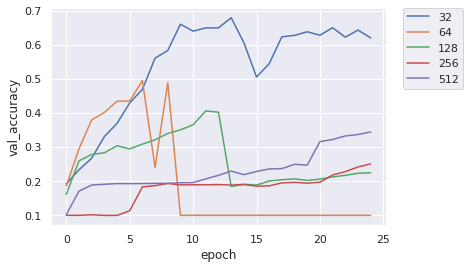

In [43]:
batch_sizes = []
for exp, result in zip([bt_smallest, bt_small, bt_default, bt_large, bt_largest], ["32", "64", "128", "256", "512"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result
    batch_sizes.append(df)
df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')

sns.set(style="darkgrid")
sns.lineplot(x='epoch', y='val_accuracy', hue = 'Batch Size', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [48]:
lr = 1
model = create_model(lr = lr, opt = SGD(learning_rate=lr))
lr_largest = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 402872.0312 - accuracy: 0.0988 - val_loss: 2.3149 - val_accuracy: 0.1000
Epoch 2/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3097 - accuracy: 0.1019 - val_loss: 2.3155 - val_accuracy: 0.1000
Epoch 3/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3101 - accuracy: 0.0997 - val_loss: 2.3096 - val_accuracy: 0.1000
Epoch 4/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3100 - accuracy: 0.0980 - val_loss: 2.3074 - val_accuracy: 0.1000
Epoch 5/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3100 - accuracy: 0.0982 - val_loss: 2.3073 - val_accuracy: 0.1000
Epoch 6/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3106 - accuracy: 0.1003 - val_loss: 2.3107 - val_accuracy: 0.1000
Epoch 7/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3097 - accuracy: 0.1008 - val_loss: 2.3085 - val_accu

In [49]:
lr = 0.1
model = create_model(lr = lr, opt = SGD(learning_rate=lr))
lr_large = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 621.4458 - accuracy: 0.0994 - val_loss: 3334.4121 - val_accuracy: 0.0999
Epoch 2/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3034 - accuracy: 0.0990 - val_loss: 3334.4021 - val_accuracy: 0.1000
Epoch 3/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3033 - accuracy: 0.0995 - val_loss: 3334.4155 - val_accuracy: 0.0999
Epoch 4/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3034 - accuracy: 0.0980 - val_loss: 3334.4084 - val_accuracy: 0.1000
Epoch 5/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3033 - accuracy: 0.0997 - val_loss: 3334.4033 - val_accuracy: 0.1000
Epoch 6/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3033 - accuracy: 0.1013 - val_loss: 3334.4016 - val_accuracy: 0.1000
Epoch 7/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3033 - accuracy: 0.1008 - val_loss: 33

In [50]:
lr = 0.01
model = create_model(lr = lr, opt = SGD(learning_rate=lr))
lr_default = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1367.0112 - accuracy: 0.0983 - val_loss: 2.2992 - val_accuracy: 0.1040
Epoch 2/25
2000/2000 [==============================] - 3s 1ms/step - loss: 4.4344 - accuracy: 0.1268 - val_loss: 2.3041 - val_accuracy: 0.1001
Epoch 3/25
2000/2000 [==============================] - 3s 1ms/step - loss: 2.3029 - accuracy: 0.0980 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3016 - accuracy: 0.0968 - val_loss: 2.2953 - val_accuracy: 0.1076
Epoch 5/25
2000/2000 [==============================] - 3s 1ms/step - loss: 11.2066 - accuracy: 0.1267 - val_loss: 2.3059 - val_accuracy: 0.1000
Epoch 6/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.2958 - accuracy: 0.1042 - val_loss: 2.2657 - val_accuracy: 0.1211
Epoch 7/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.2278 - accuracy: 0.1384 - val_loss: 2.1789 - val_accur

In [51]:
lr = 0.001
model = create_model(lr = lr, opt = SGD(learning_rate=lr))
lr_small = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.1578 - accuracy: 0.2399 - val_loss: 1.8637 - val_accuracy: 0.3246
Epoch 2/25
2000/2000 [==============================] - 3s 1ms/step - loss: 1.7969 - accuracy: 0.3492 - val_loss: 1.7706 - val_accuracy: 0.3461
Epoch 3/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.7203 - accuracy: 0.3704 - val_loss: 1.7031 - val_accuracy: 0.3781
Epoch 4/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.6518 - accuracy: 0.3875 - val_loss: 1.5747 - val_accuracy: 0.3931
Epoch 5/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.5142 - accuracy: 0.4445 - val_loss: 1.5483 - val_accuracy: 0.4985
Epoch 6/25
2000/2000 [==============================] - 3s 2ms/step - loss: 1.4441 - accuracy: 0.4933 - val_loss: 1.4557 - val_accuracy: 0.4978
Epoch 7/25
2000/2000 [==============================] - 3s 1ms/step - loss: 1.3874 - accuracy: 0.5131 - val_loss: 1.3934 - val_accuracy:

In [52]:
lr = 0.0001
model = create_model(lr = lr, opt = SGD(learning_rate=lr))
lr_smallest = model.fit(
    X_train, y_train, 
    epochs=25,
    batch_size=32,
    validation_data=(X_val,y_val))

Epoch 1/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.6976 - accuracy: 0.1037 - val_loss: 2.3141 - val_accuracy: 0.1014
Epoch 2/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3078 - accuracy: 0.1011 - val_loss: 2.3085 - val_accuracy: 0.1013
Epoch 3/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.3045 - accuracy: 0.1015 - val_loss: 2.3072 - val_accuracy: 0.1018
Epoch 4/25
2000/2000 [==============================] - 3s 1ms/step - loss: 2.3008 - accuracy: 0.1035 - val_loss: 2.2986 - val_accuracy: 0.1090
Epoch 5/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.2497 - accuracy: 0.1345 - val_loss: 2.2257 - val_accuracy: 0.1470
Epoch 6/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.2116 - accuracy: 0.1501 - val_loss: 2.2082 - val_accuracy: 0.1539
Epoch 7/25
2000/2000 [==============================] - 3s 2ms/step - loss: 2.1988 - accuracy: 0.1549 - val_loss: 2.1996 - val_accuracy:

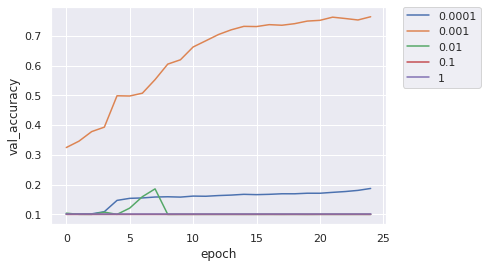

In [53]:
learning_rates = []
for exp, result in zip([lr_smallest, lr_small, lr_default, lr_large, lr_largest], ["0.0001", "0.001", "0.01", "0.1", "1"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result
    learning_rates.append(df)
df = pd.concat(learning_rates)
df['Learning Rate'] = df['Learning Rate'].astype('str')

sns.set(style="darkgrid")
sns.lineplot(x='epoch', y='val_accuracy', hue = 'Learning Rate', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Your answer goes here.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


